### TITANIC (KAGGLE)
#### Luan Alecxander Krzyzaniak - 2023/2
Includes code for SVM, K-Neighbors and Gradient Boosting

In [105]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn

In [106]:
from pandas import read_csv

trainfile = read_csv("./input/train.csv")
testfile = read_csv("./input/test.csv")

trainDF = trainfile
testDF = testfile

### FUNCTIONS

Basic panda's scoring

In [107]:
def scoring(classifier, X_train, Y_train, X_test, Y_test):
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_test, Y_test)
    return score

### DATA PLOTTING


In [108]:
trainfile.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [109]:
trainfile.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

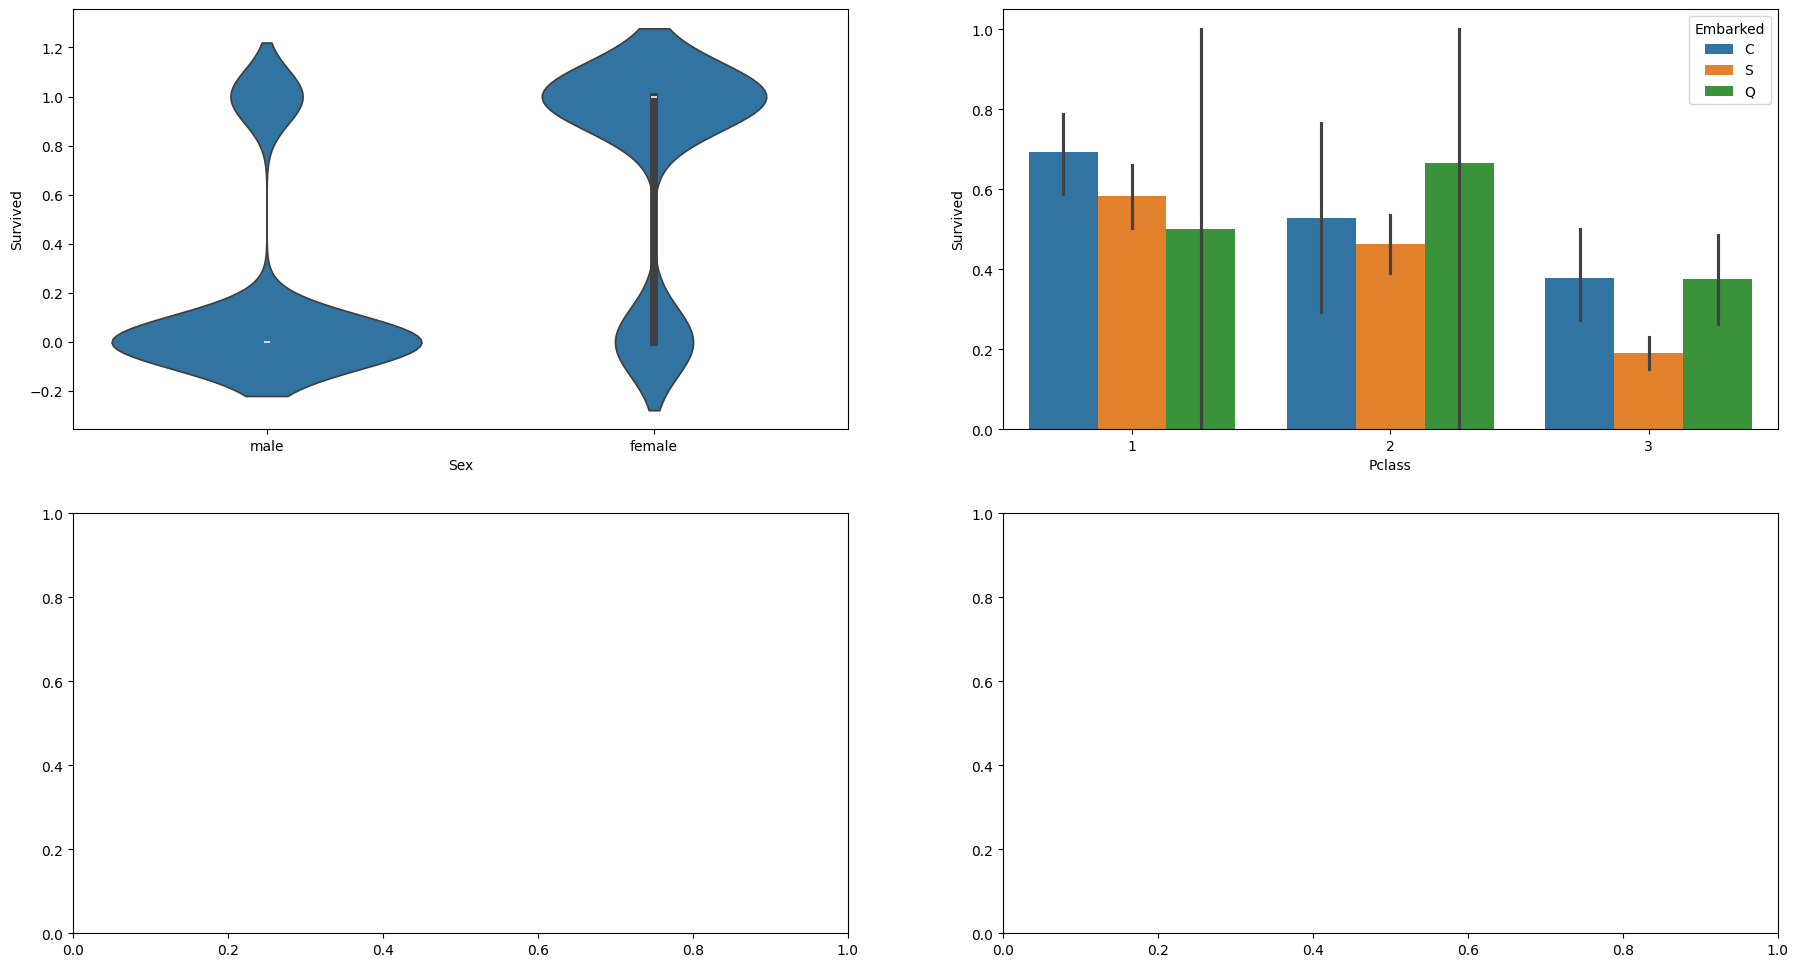

In [110]:
f, ax = plt.subplots(2, 2,figsize=[22,12])
sn.violinplot(x = 'Sex', y = 'Survived', data = trainfile,ax = ax[0,0])
sn.barplot(x = 'Pclass',y ='Survived',data = trainfile,hue = 'Embarked',ax = ax[0,1])


<Axes: xlabel='Pclass'>

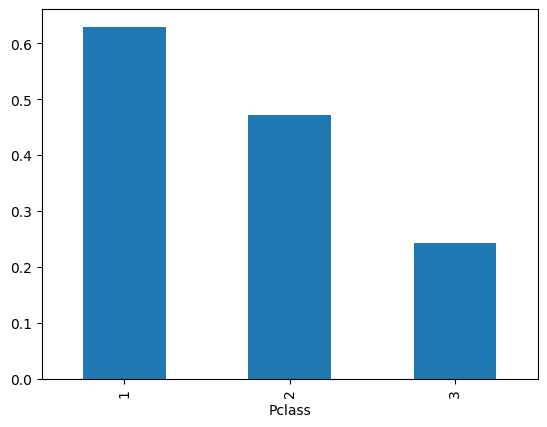

In [111]:
trainfile.groupby('Pclass').Survived.mean().plot(kind='bar')

<Axes: xlabel='Pclass'>

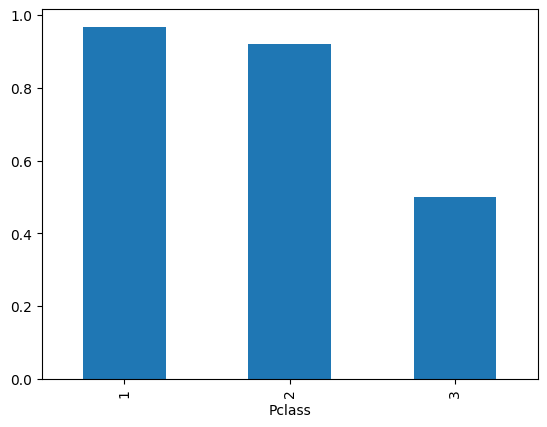

In [112]:
trainfile.query('Sex == "female"').groupby('Pclass').Survived.mean().plot(kind='bar')

<Figure size 1700x600 with 0 Axes>

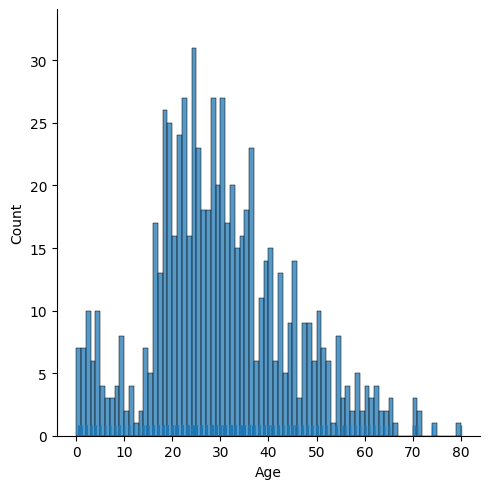

In [113]:
plt.figure(figsize = [17,6])
a = sn.displot(trainfile['Age'].dropna(),bins = range(0,81,1), rug = True)

### DATA TREATMENT

Preparing sets

In [114]:
dropped = ["PassengerId", "Name", "Ticket", "Age", "Fare", "Cabin"]

trainDF = trainfile.drop(columns=dropped + ["Survived"])
trainDF_y = trainfile["Survived"]
testDF = testfile.drop(columns=dropped)

trainDF.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [115]:
# import re
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
# data = [trainDF, testDF]

# for dataset in data:
#     dataset['Cabin'] = dataset['Cabin'].fillna("U0")
#     dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#     dataset['Deck'] = dataset['Deck'].map(deck)
#     dataset['Deck'] = dataset['Deck'].fillna(0)
#     dataset['Deck'] = dataset['Deck'].astype(int)

Factorizing - changing discrete values to classified values

In [116]:
# Convert sex and embarked
trainDF['Sex']=pd.factorize(trainDF['Sex'])[0] # F=0 M=1
trainDF['Embarked']=pd.factorize(trainDF['Embarked'])[0] # C=0 Q=1 S=2
testDF['Sex']=pd.factorize(testDF['Sex'])[0] # F=0 M=1
testDF['Embarked']=pd.factorize(testDF['Embarked'])[0] # C=0 Q=1 S=2

#mean = x_test['Fare'].mean()
#x_test['Fare'].fillna(value=mean, inplace=True) 
#x_test.isna().sum()


trainDF["Family"] = trainDF['SibSp'] + trainDF['Parch']
trainDF = trainDF.drop(columns=["SibSp", "Parch"])
testDF["Family"] = testDF['SibSp'] + testDF['Parch']
testDF = testDF.drop(columns=["SibSp", "Parch"])


                                                
trainDF.head()

,Pclass,Sex,Embarked,Family
0,3,0,0,1
1,1,1,1,1
2,3,1,0,0
3,1,1,0,1
4,3,0,0,0


### SCORING

In [117]:
from sklearn.model_selection import train_test_split

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, X_test, Y_train, Y_test = train_test_split(trainDF, trainDF_y, test_size=0.2, random_state=0)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 140 to 684
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    int64
 2   Embarked  712 non-null    int64
 3   Family    712 non-null    int64
dtypes: int64(4)
memory usage: 27.8 KB


Cross validation and scoring using sklearn's `cross_val_score`  

In [118]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf_svm = SVC(kernel='poly')
clf_kn = KNeighborsClassifier(n_neighbors=1)
clf_gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

Classifiers = ['SVM', 'K-Neighbors', 'GradientBoosting']
scores = []
models = [clf_svm, clf_kn, clf_gb]
for model in models:
    score = cross_val_score(model, trainDF, trainDF_y, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)
    
scoretable = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
            ascending = False)

scoretable

,score
SVM,0.802472
GradientBoosting,0.782285
K-Neighbors,0.733920


Scoring using panda's `.score`

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report as cr

print(scoring(clf_svm, X_train, Y_train, X_test, Y_test))
print(scoring(clf_kn, X_train, Y_train, X_test, Y_test))
print(scoring(clf_gb, X_train, Y_train, X_test, Y_test))

y_svm = clf_svm.predict(X_test)
print(cr(y_svm, Y_test))

0.8156424581005587
0.7877094972067039
0.8100558659217877
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       117
           1       0.71      0.79      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



### SUBMIT GENERATION

Support Vector Machine

In [120]:
clf_svm.fit(trainDF, trainDF_y)

predictions = clf_svm.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/svm.csv', index=False)

K-Neighbors

In [121]:
clf_kn.fit(trainDF, trainDF_y)

predictions = clf_kn.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/kneighbors.csv', index=False)

Gradient Boosting

In [122]:
clf_gb.fit(trainDF, trainDF_y)

predictions = clf_gb.predict(testDF)

output = pd.DataFrame({'PassengerId': testfile['PassengerId'], 'Survived': predictions})
output.to_csv('./output/gradientboosting.csv', index=False)